In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def parse_dotted_date(x):
    return datetime.strptime(x, '%d.%m.%Y')

In [3]:
df = pd.read_csv('train.csv', parse_dates=['Date'], index_col='Date', date_parser=parse_dotted_date)
df['y'] = df['ACTUAL']
df['t'] = df['Temp']
df.drop(['Saturday', 'Sunday', 'ACTUAL', 'Temp'], 1, inplace=True)
df.head()

,ID,tsID,y,t
Date,,,,
2010-01-01,1,4,35489.95,-0.9
2010-01-02,2,4,35413.59,-0.1
2010-01-03,3,4,34802.67,-3.9
2010-01-04,4,4,36003.84,-13.7
2010-01-05,5,4,37622.96,-16.9


In [4]:
def get_kth_series(k):
    return df[df['tsID']==k].loc[:, ['ID','y','t']]

In [5]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100.

In [11]:
def predict_kth_series(k):
    sk = get_kth_series(k)
    sk = sk.asfreq(freq='D')
    
    future = sk[-30:]
    # given
    tsk = sk['y'][:-30]
    tk = sk['t'][:-30]
    
    model = SARIMAX(tsk, tk, order=(1,0,1)).fit()
    
    frc_range = pd.date_range(tsk.index[-1], periods=31, freq='D')
    predicted = pd.DataFrame(
        model.predict(start=frc_range[0], end=frc_range[-1], exog=future['t'].values.reshape((30,1)))[1:],
        index=future['t'].index
    )
    
    return predicted

In [12]:
answer = pd.DataFrame()
for k in range(1, 23):
    answer = answer.append(predict_kth_series(k))    

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning

In [14]:
# save forecast to disk for further submission
answer.to_csv('result.csv', index=False)

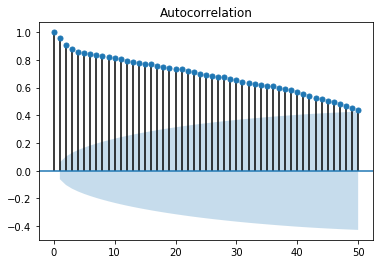

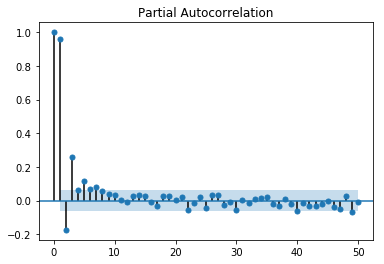

In [275]:
# sm.graphics.tsa.plot_acf(tk, lags=50)
# sm.graphics.tsa.plot_pacf(tk, lags=50)
# plt.show()

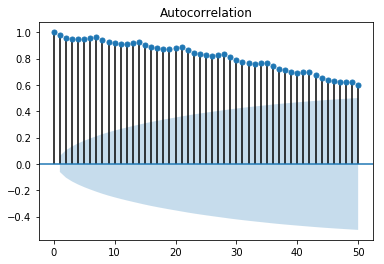

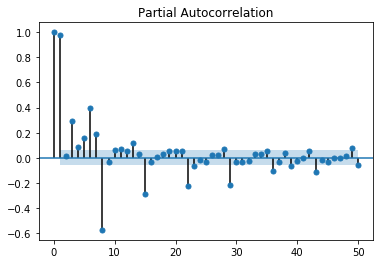

In [305]:
# sm.graphics.tsa.plot_acf(tsk, lags=50)
# sm.graphics.tsa.plot_pacf(tsk, lags=50)
# plt.show()

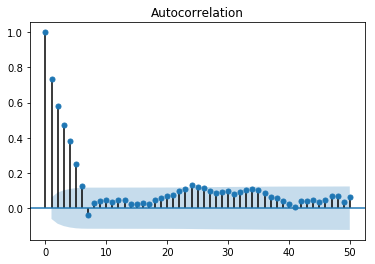

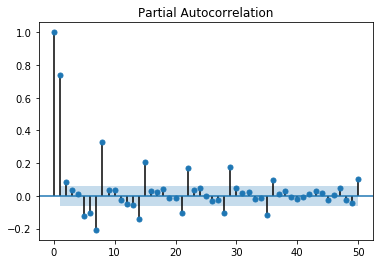

In [306]:
# s = 7
# sdiff_ts1 = (ts1 - ts1.shift(s))[s:]
# sm.graphics.tsa.plot_acf(sdiff_ts1, lags=50)
# sm.graphics.tsa.plot_pacf(sdiff_ts1, lags=50)
# plt.show()

(-5.1432899907715628,
 1.1465115707402855e-05,
 21,
 1006,
 {'1%': -3.436866962597422,
  '10%': -2.5683020002450507,
  '5%': -2.8644172846037028},
 18616.78052778545)

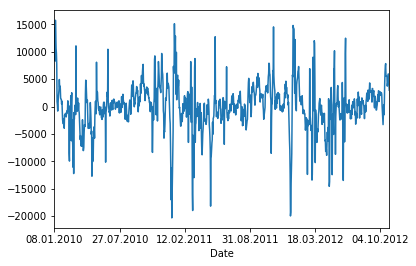

In [309]:
# sdiff_ts1.plot()
# sm.tsa.adfuller(sdiff_ts1)

In [56]:
# arima_tune(ts1, range(8), [1], range(8))

/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

((6, 1, 7), 19034.949738426578)

In [57]:
# best_model = ARIMA(ts1, (6, 1, 7)).fit()

/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/pasha/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


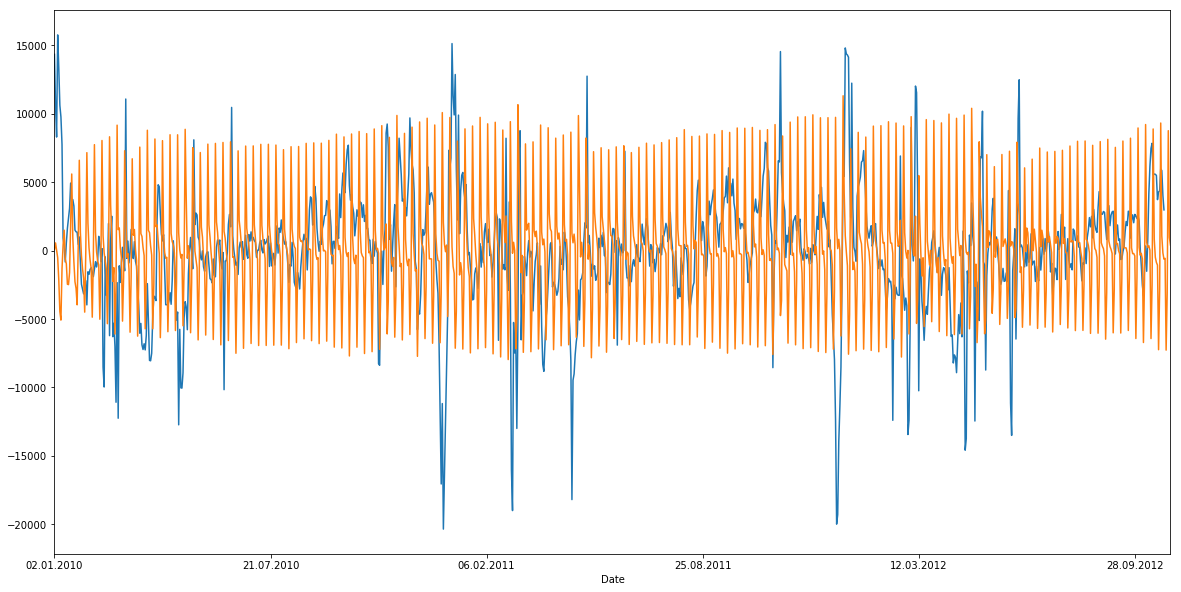

In [61]:
# sdiff_ts1.plot(figsize=(20, 10))
# best_model.fittedvalues.plot(figsize=(20, 10))
# plt.show()